# Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know -
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


### 1: Reading and Understanding the Data

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# loading the data

bike_data = pd.read_csv('bike-sharing-data.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


__Note:__ We observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

In [5]:
# Assigning string values to different seasons instead of numeric values.

bike_data.loc[(bike_data.season == 1), 'season'] = 'spring'
bike_data.loc[(bike_data.season == 2), 'season'] = 'summer'
bike_data.loc[(bike_data.season == 3), 'season'] = 'fall'
bike_data.loc[(bike_data.season == 4), 'season'] = 'winter'

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# checking the data for season variable now
bike_data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [7]:
# checking the data for yr variable

bike_data.yr.value_counts()

# we do not convert 0 to 2018 and 1 to 2019, since it's binary data

0    365
1    365
Name: yr, dtype: int64

In [8]:
# asigning string values to the variable mnth

bike_data[['mnth']] = bike_data[['mnth']].apply(lambda x: x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}))

bike_data.mnth.value_counts()

Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [9]:
# checking data for holiday variable

bike_data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [10]:
# converting weekday to strings

bike_data[['weekday']] = bike_data[['weekday']].apply(lambda x: x.map({0: 'Tues', 1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon'}))

# Note - We consider Wednesday as 1 since on checking the data's dteday column and matching it with weekday column
# we see that wednesday is 1 as weekday and monday is 6 as weekday. Therefore it's safe to say that in the data
# week starts with tuesday and ends at wednesday

bike_data.weekday.value_counts()

Mon      105
Tues     105
Wed      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: weekday, dtype: int64

In [11]:
# checking data of workingday

bike_data.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [12]:
# checking data of weathersit

bike_data.weathersit.value_counts()

# According to the data dictionary
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


1    463
2    246
3     21
Name: weathersit, dtype: int64

In [13]:
# we need to convert weathersit to strings, but we can replace the big strings in data dictionary with characters
# like 'A','B','C' and 'D'

bike_data[['weathersit']] = bike_data[['weathersit']].apply(lambda x: x.map({1:'A', 2:'B', 3:'C', 4:'D'}))
bike_data.weathersit.value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [14]:
# checking the final dataset

bike_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,Jan,0,Sat,1,A,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,Jan,0,Sun,1,B,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,Jan,0,Mon,0,B,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,Jan,0,Tues,0,A,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,Jan,0,Wed,1,A,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [15]:
# Performing auto EDA

import sweetviz as sv 
sweet_report = sv.analyze(bike_data) 
sweet_report.show_html('bike_data_sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report bike_data_sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 2: Data Visualisation

Checking distribution of numeric variables

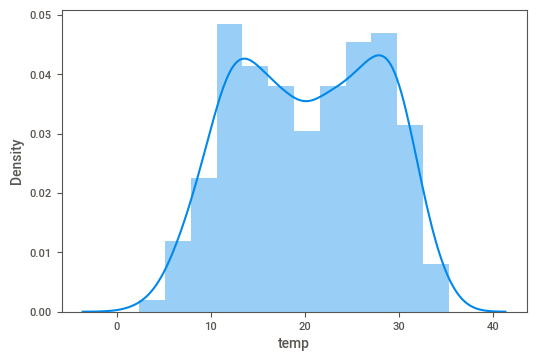

In [16]:
# visualising temp

sns.distplot(bike_data.temp)
plt.show()

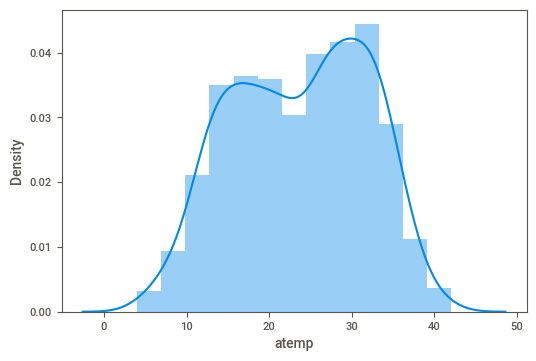

In [17]:
# visualising atemp

sns.distplot(bike_data.atemp)
plt.show()

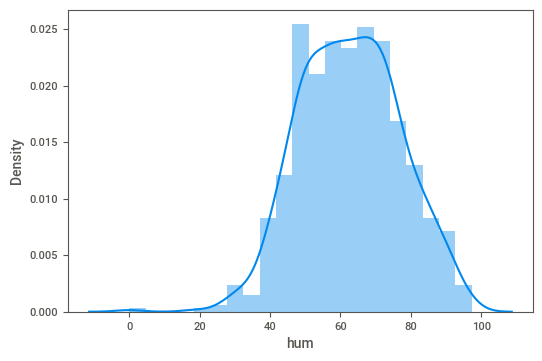

In [18]:
# visualising hum

sns.distplot(bike_data.hum)
plt.show()

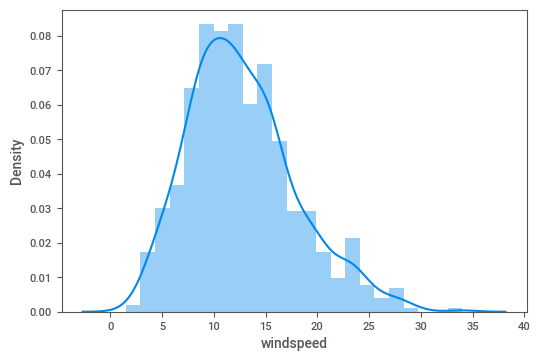

In [19]:
# visualising windspeed

sns.distplot(bike_data.windspeed)
plt.show()

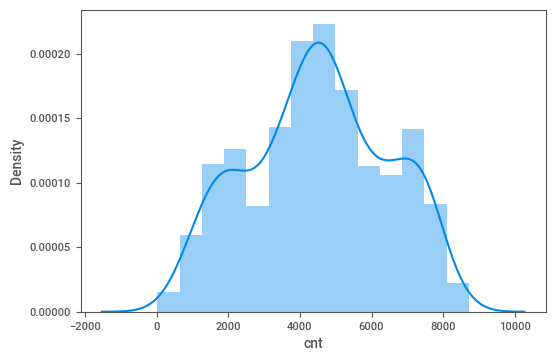

In [20]:
# visualising cnt

sns.distplot(bike_data.cnt)
plt.show()

In [21]:
# Converting date to datetime format
bike_data.dteday = bike_data.dteday.astype('datetime64')

# storing all the categorical variables in the dataset
bike_data_catg = bike_data.select_dtypes(exclude=['float64','datetime64','int64'])
bike_data_catg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


Visualising Categorical Variables of the Dataset

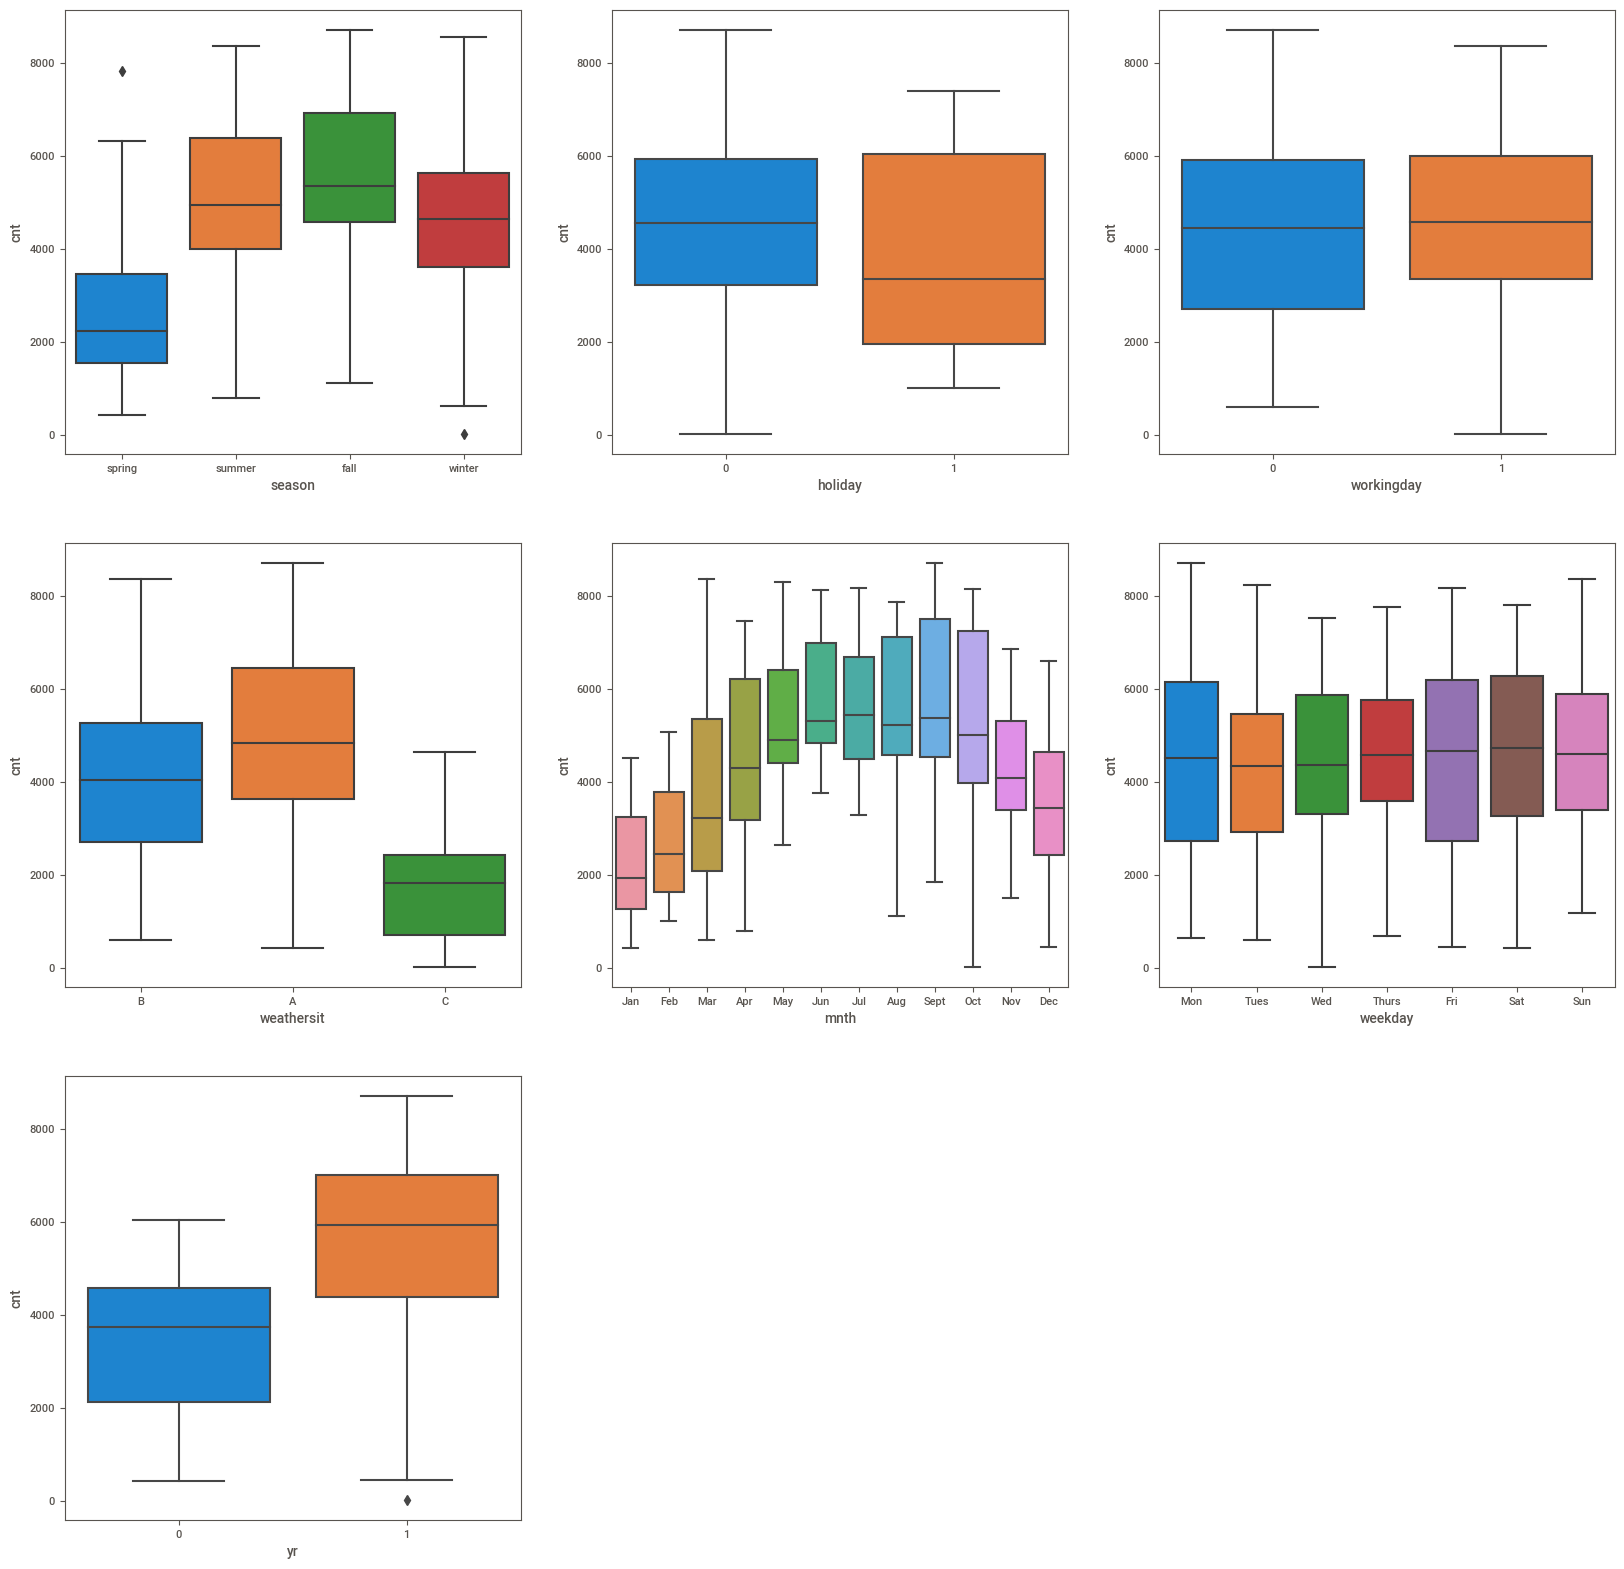

In [22]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.show()

# Note - Here we plot holiday, workday and year as well, since even though they have binay data 
# those are categorical varibales (yes/no)

Visulaising Numeric Variables in the Dataset

In [23]:
bike_data.casual= bike_data.casual.astype('float')
bike_data.registered= bike_data.registered.astype('float')
bike_data.cnt= bike_data.cnt.astype('float')

In [24]:
bike_data_num =bike_data.select_dtypes(include=['float64'])
bike_data_num.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


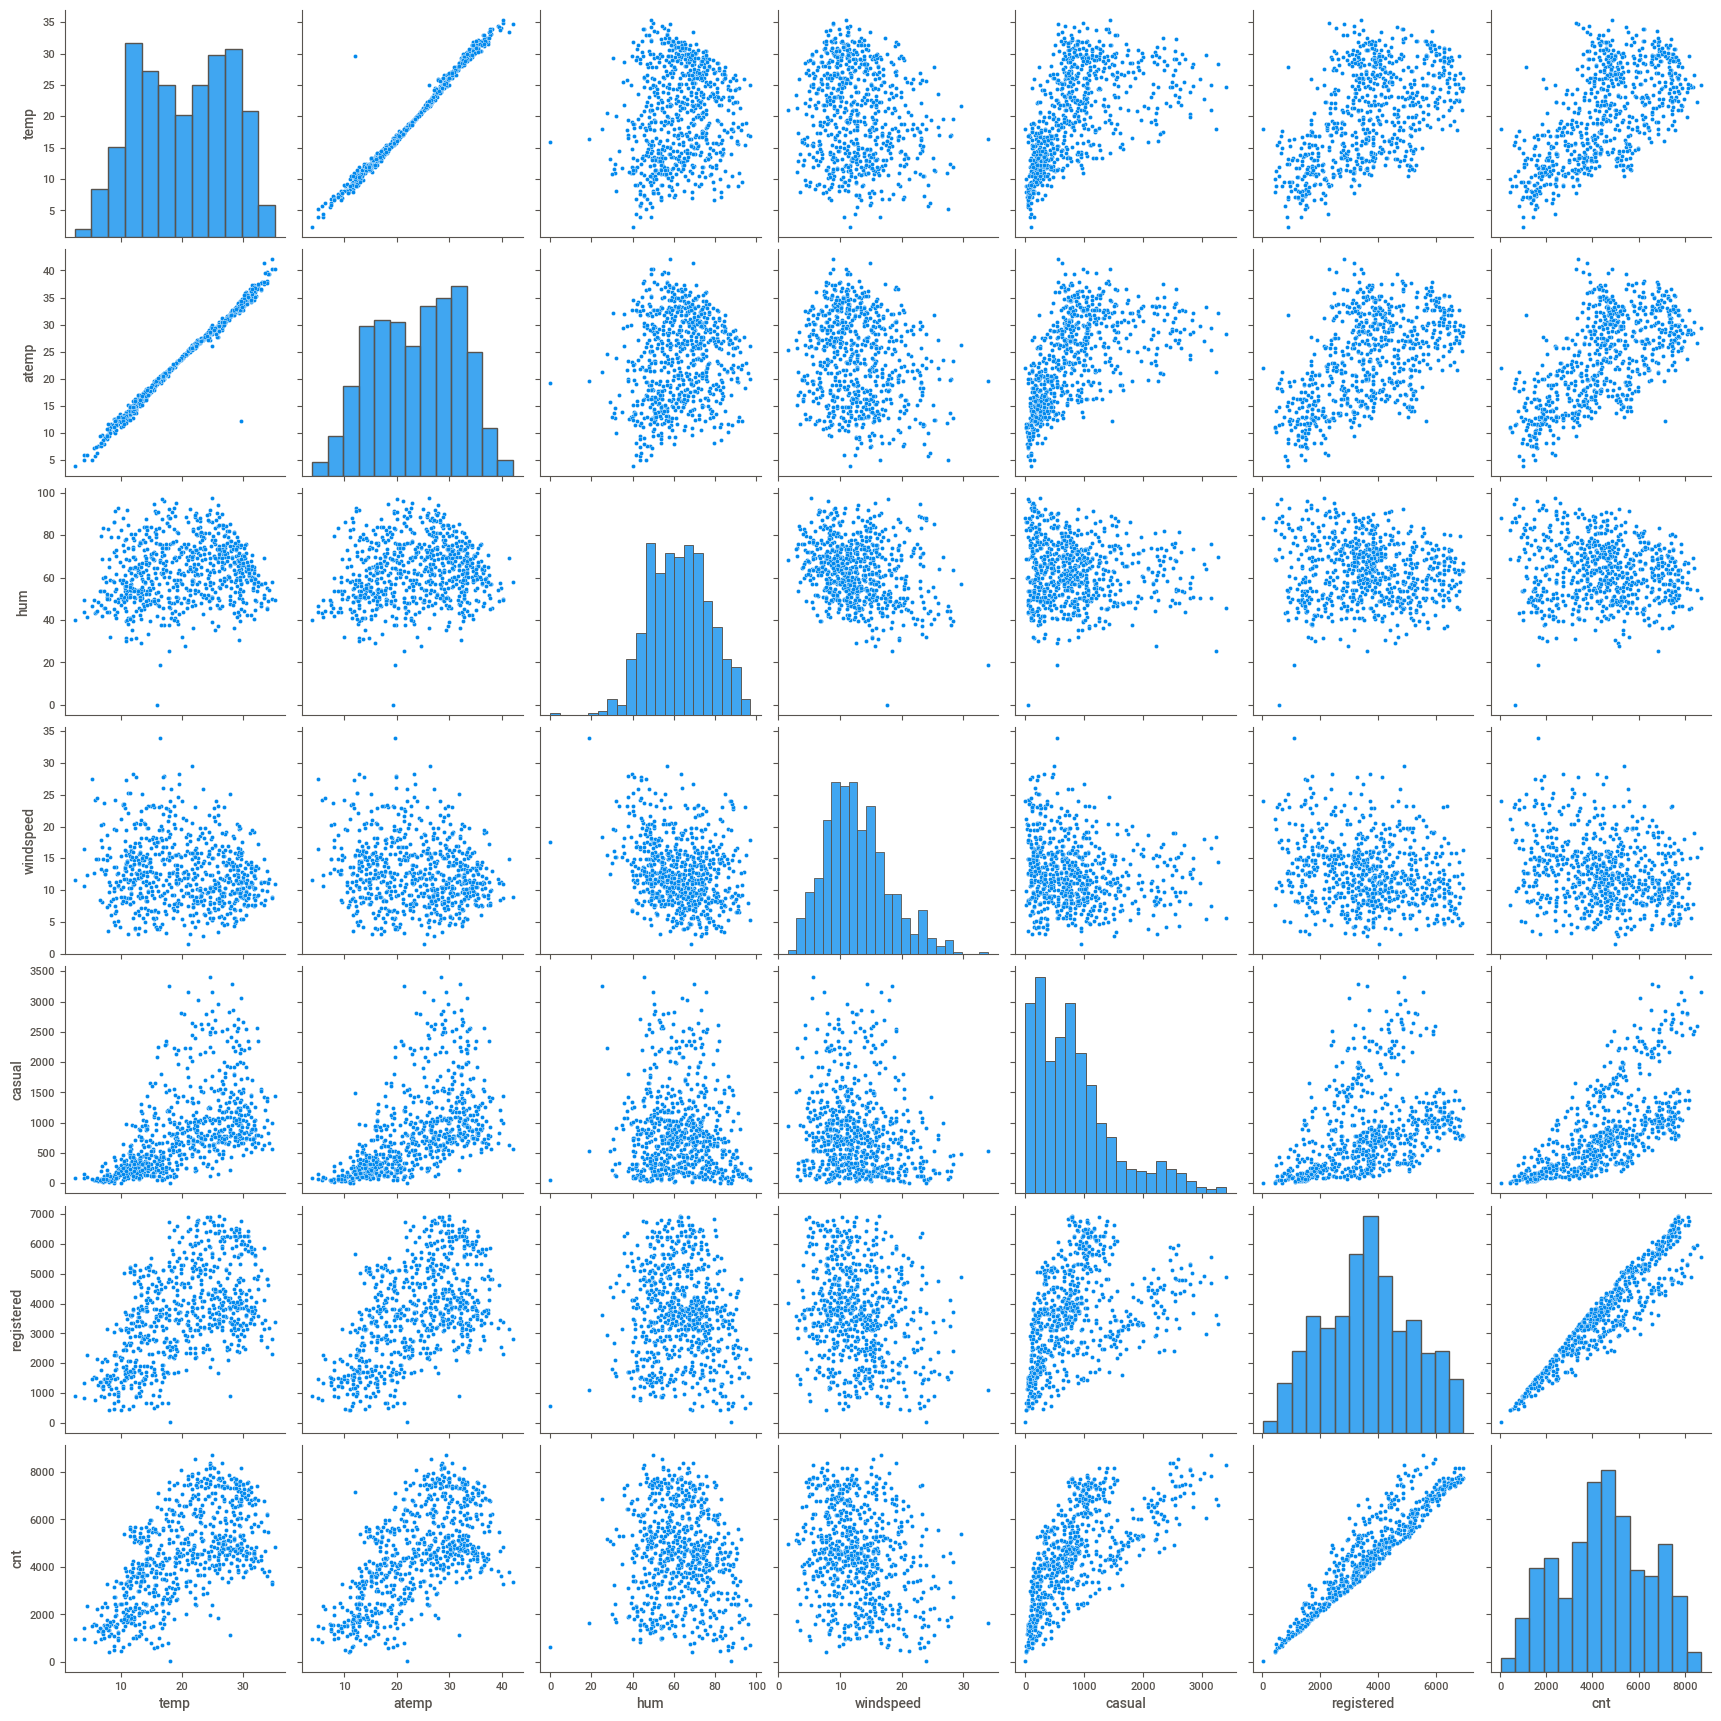

In [25]:
# pairplot
sns.pairplot(bike_data_num)
plt.show()

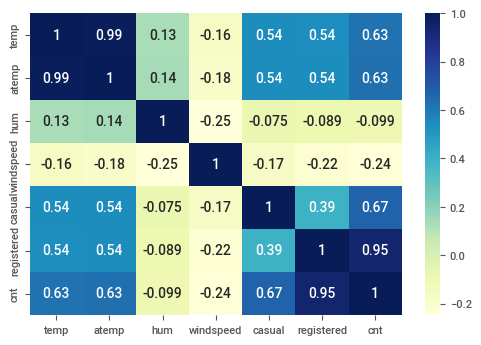

In [26]:
# heatmap

sns.heatmap(bike_data_num.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [27]:
#removing atemp as it is highly correlated with temp
bike_data.drop('atemp',axis=1,inplace=True) 

### 3: Preparing the Data for Modelling

In [28]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Tues,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Wed,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Fri,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


Encoding Category Variables to Dummy Variables

In [29]:
# Subsetting all category variables which doesn't have binary data

bike_data_catg = bike_data.select_dtypes(include='object')
bike_data_catg.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A


In [30]:
bike_data_dummy = pd.get_dummies(bike_data_catg, drop_first=True)
# we are dropping the first columns since number of dummy vars = predictor - 1
bike_data_dummy.head(10)

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# dropping the category vars which doesn't have binary data, since we now have dummy vars that has binary data
bike_data = bike_data.drop(bike_data_catg.columns, axis=1)

In [32]:
# concatenating dummy vars dataframe with original dataframe
bike_data = pd.concat([bike_data, bike_data_dummy], axis=1)
bike_data.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Dropping the instant and dteday columns, since it's of no use for analysis
# Dropping the casual and registered vars because they together add up as cnt which is our target var

bike_data.drop(['dteday','instant','casual','registered'], axis=1, inplace=True)

bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting into train and test

In [34]:
bike_data_train, bike_data_test = train_test_split(bike_data, train_size=0.70, random_state=100)

print(bike_data_train.shape)
print(bike_data_test.shape)

(510, 29)
(220, 29)


Rescaling the Numeric Variables

In [35]:
scaler = MinMaxScaler()

In [36]:
# storing the list of integer variables
num_vars = ['temp', 'hum', 'windspeed','cnt']
# scaling
bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])
bike_data_train.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,1,0
580,1,0,0,0.914852,0.632030,0.462538,0.782559,0,0,0,...,0,0,1,0,0,0,0,0,0,0
500,1,0,1,0.719639,0.719193,0.172431,0.851588,0,1,0,...,0,0,0,0,0,0,0,0,0,0
479,1,0,1,0.520271,0.440962,0.164434,0.710308,0,1,0,...,0,0,0,0,0,0,0,0,0,0
472,1,0,1,0.503656,0.586518,0.270032,0.499885,0,1,0,...,0,0,0,0,0,0,0,0,1,0
455,1,0,0,0.456929,0.696865,0.279394,0.692476,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
bike_data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


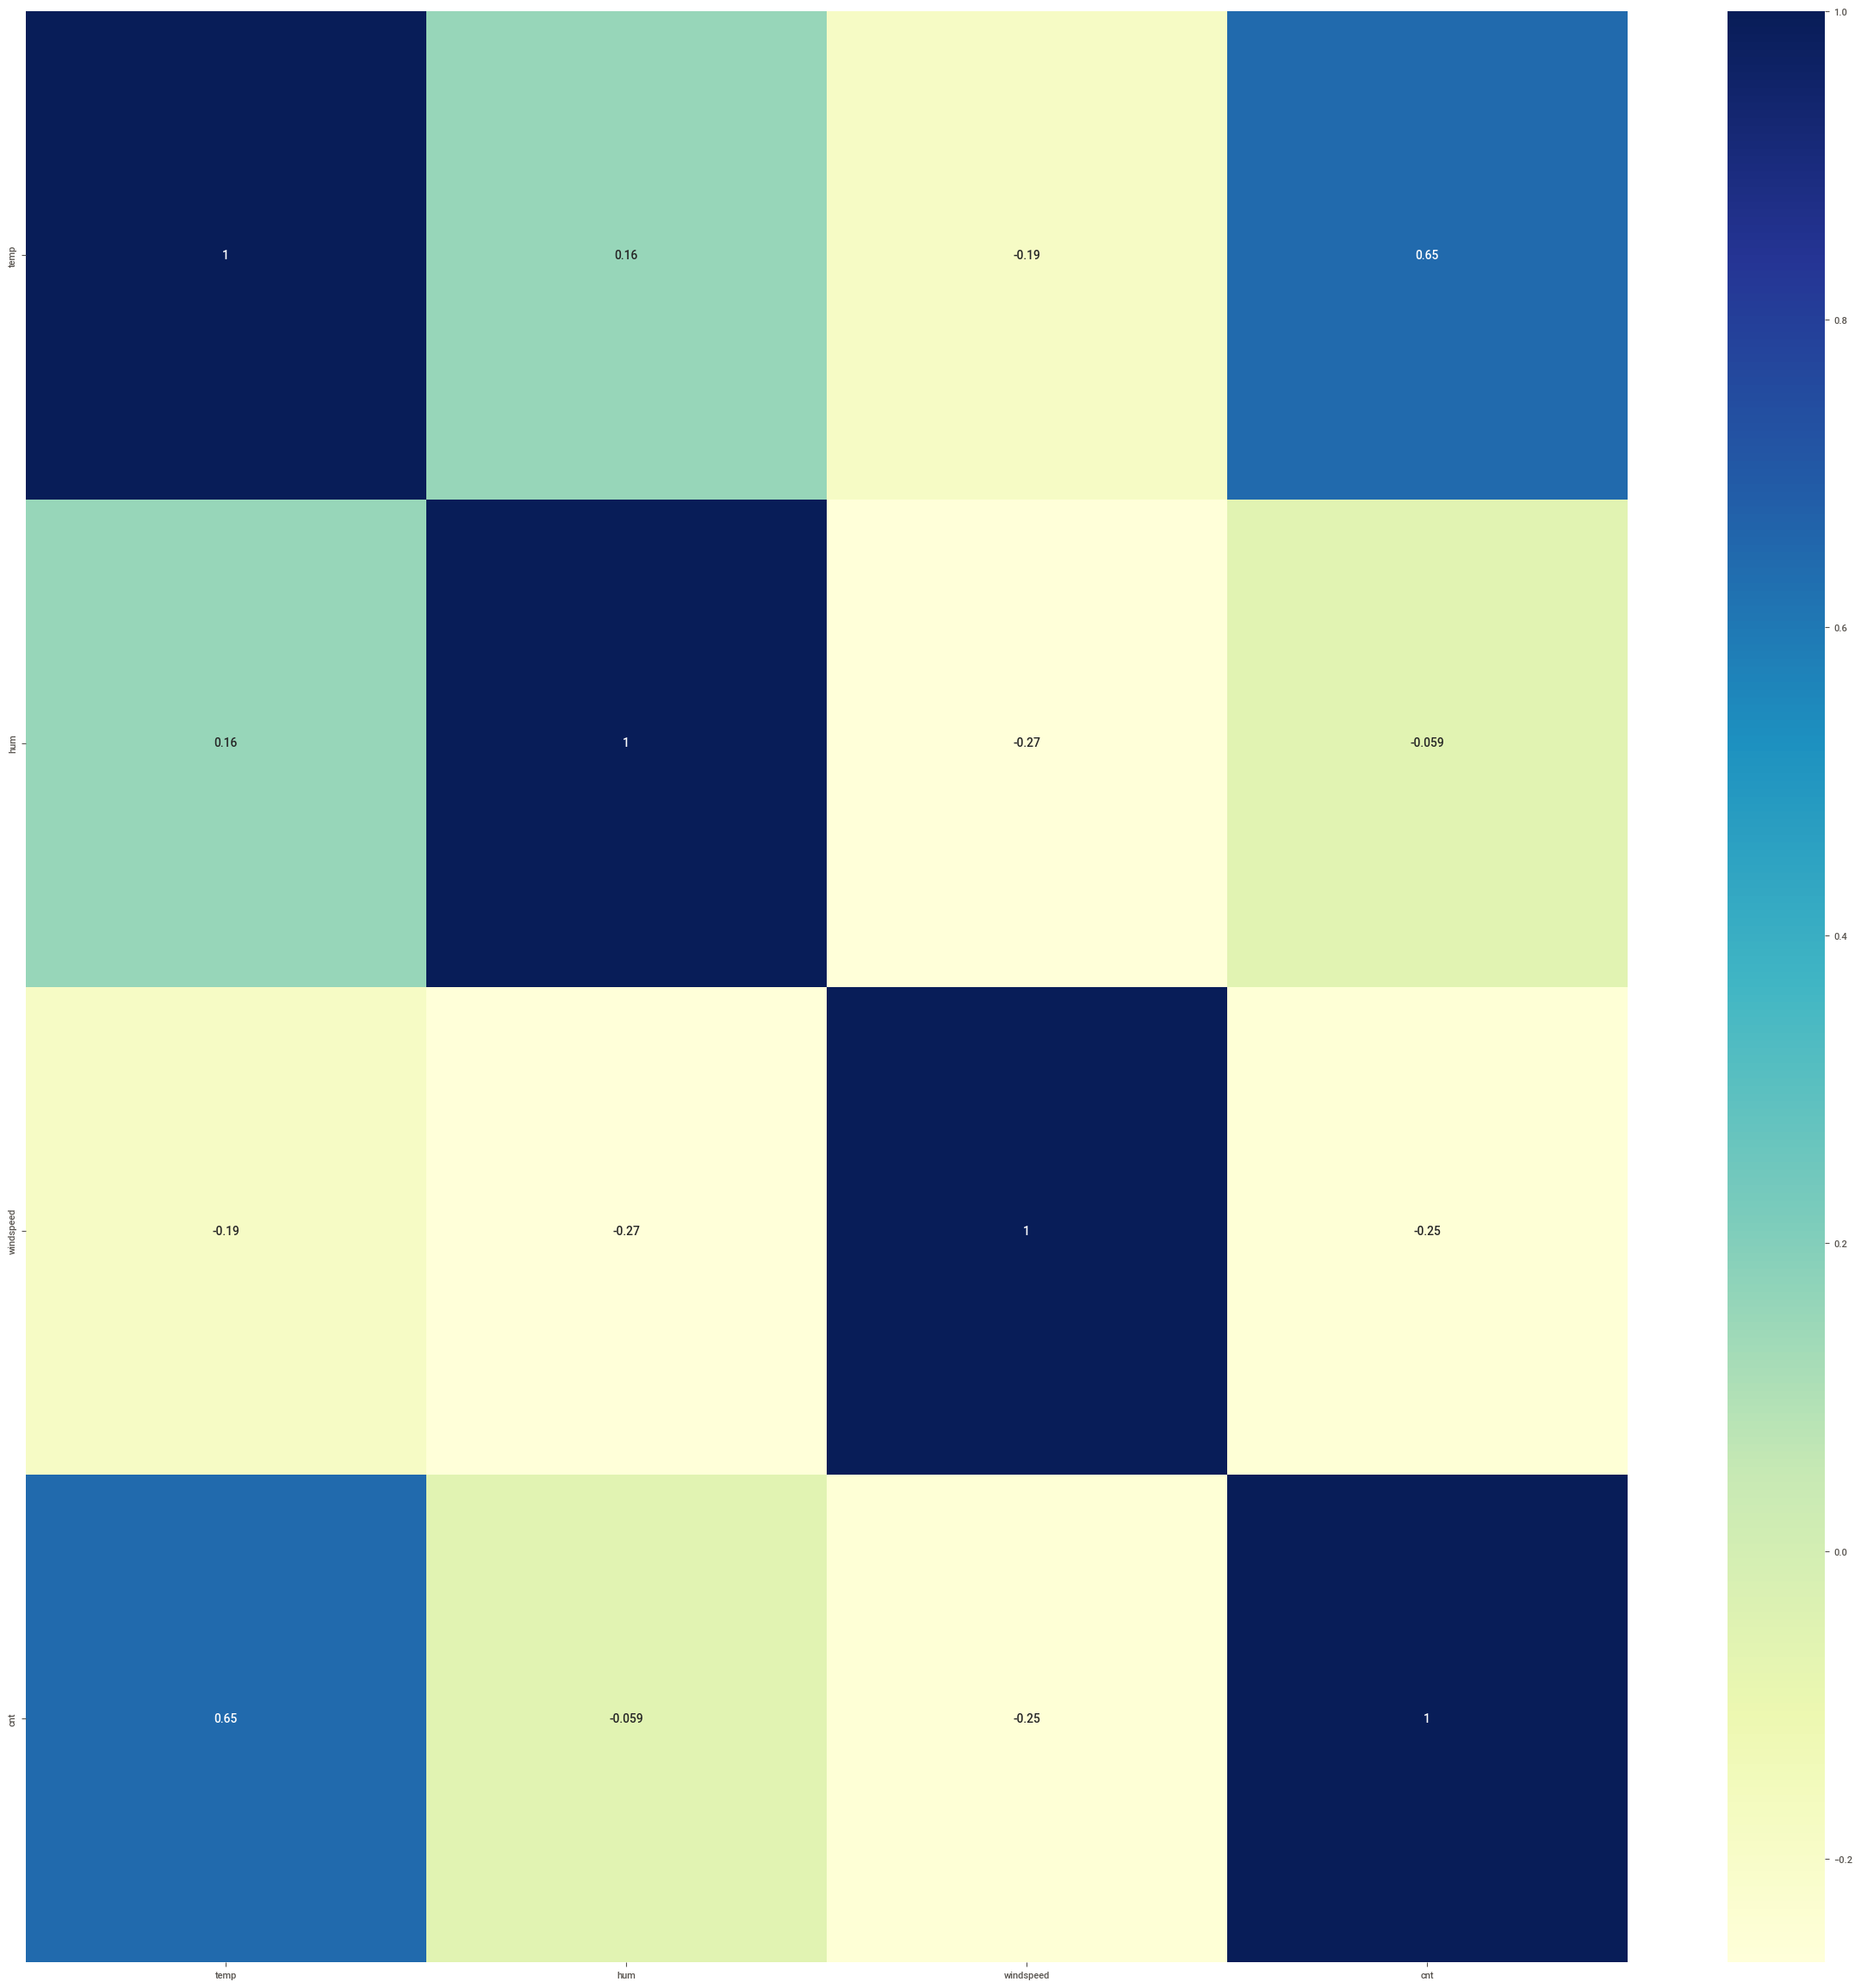

In [38]:
# checking the coefficients once again before modelling

plt.figure(figsize = (30, 30))
sns.heatmap(bike_data_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

### 4: Training the Model

In [39]:
# creating X_train and y_train
X_train = bike_data_train.drop('cnt',axis=1)
y_train = bike_data_train.cnt

In [40]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
X_train.shape

(510, 28)

Building the model using RFE

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe14 = RFE(lr, n_features_to_select=14, step=1)
rfe14.fit(X_train,y_train)

list(zip(X_train.columns, rfe14.support_, rfe14.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 11),
 ('weekday_Thurs', False, 10),
 ('weekday_Tues', False, 8),
 ('weekday_Wed', False, 9),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [43]:
# storing the columns selected by RFE

cols = X_train.columns[rfe14.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Mon', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [44]:
# displaying columns not selected by RFE
X_train.columns[~rfe14.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

In [45]:
X_train_rfe = X_train[cols]

# Adding a constant as stats model doesn't automatically account for it
X_train_rfe_const = sm.add_constant(X_train_rfe)

In [46]:
# building the model

lm = sm.OLS(y_train, X_train_rfe_const)
lm_model = lm.fit()

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.11e-191
Time:                        18:56:08   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714      0.000       0.170       0.310
yr                0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday        0.0430      0.012      3.725      0.000       0.020       0.066
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring    -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer     0.0537      0.015      3.631      0.000       0.025       0.083
season_winter     0.0992      0.017      5.815      0.000       0.066       0.133
mnth_Jul         -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sept         0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Mon       0.0530      0.015      3.648      0.000       0.024       0.082
weathersit_B     -0.0563      0.010     -5.425      0.000      -0.077      -0.036
weathersit_C     -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.42
7,season_summer,2.85
12,weathersit_B,2.29
0,yr,2.08
11,weekday_Mon,1.97


In [48]:
# since a few variables has very high VIF but low p-value, we will rebuild the model this time with 10 variables

lr = LinearRegression()
lr.fit(X_train,y_train)

rfe10 = RFE(lr, n_features_to_select=10, step=1)
rfe10.fit(X_train,y_train)

list(zip(X_train.columns, rfe10.support_, rfe10.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 8),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 17),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 10),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', False, 16),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', False, 18),
 ('weekday_Sun', False, 15),
 ('weekday_Thurs', False, 14),
 ('weekday_Tues', False, 12),
 ('weekday_Wed', False, 13),
 ('weathersit_B', False, 3),
 ('weathersit_C', True, 1)]

In [49]:
# storing the columns selected by RFE

cols = X_train.columns[rfe10.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sept', 'weathersit_C'],
      dtype='object')

In [50]:
X_train_rfe = X_train[cols]

# Adding a constant as stats model doesn't automatically account for it
X_train_rfe_const = sm.add_constant(X_train_rfe)

In [51]:
# building the model

lm = sm.OLS(y_train, X_train_rfe_const)
lm_model = lm.fit()

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.79e-186
Time:                        18:56:09   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2682      0.026     10.292      0.000       0.217       0.319
yr                0.2259      0.008     27.118      0.000       0.210       0.242
holiday          -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp              0.6200      0.023     27.492      0.000       0.576       0.664
hum              -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed        -0.2059      0.026     -7.889      0.000      -0.257      -0.155
season_summer     0.0800      0.011      7.281      0.000       0.058       0.102
season_winter     0.1390      0.011     12.903      0.000       0.118       0.160
mnth_Jul         -0.0482      0.018     -2.606      0.009      -0.085      -0.012
mnth_Sept         0.0944      0.016      5.724      0.000       0.062       0.127
weathersit_C     -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,season_summer,1.76
6,season_winter,1.68
7,mnth_Jul,1.55
8,mnth_Sept,1.29
9,weathersit_C,1.09
1,holiday,1.04


In [53]:
# Since hum has very high VIF, we will drop it manually and rebuild the model

X_train_rfe.drop('hum', axis=1, inplace=True)
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_Jul,mnth_Sept,weathersit_C
576,1,0,0.815169,0.264686,0,0,1,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0
728,1,0,0.245101,0.663106,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0
111,0,0,0.345824,0.380981,1,0,0,0,0


In [54]:
# Adding a constant as stats model doesn't automatically account for it
X_train_rfe_const = sm.add_constant(X_train_rfe)

In [55]:
# building the model

lm = sm.OLS(y_train, X_train_rfe_const)
lm_model = lm.fit()

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.42e-171
Time:                        18:56:09   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0840      0.018      4.794      0.000       0.050       0.118
yr                0.2329      0.009     26.061      0.000       0.215       0.251
holiday          -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp              0.5854      0.024     24.438      0.000       0.538       0.632
windspeed        -0.1459      0.027     -5.365      0.000      -0.199      -0.092
season_summer     0.0750      0.012      6.346      0.000       0.052       0.098
season_winter     0.1228      0.011     10.731      0.000       0.100       0.145
mnth_Jul         -0.0313      0.020     -1.578      0.115      -0.070       0.008
mnth_Sept         0.0822      0.018      4.640      0.000       0.047       0.117
weathersit_C     -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,season_summer,1.75
6,mnth_Jul,1.51
5,season_winter,1.43
7,mnth_Sept,1.28
8,weathersit_C,1.06
1,holiday,1.03


Since the current model has Features with VIF less than 5 and low p-value, we can consider this to be our final model

### 5: Prediction, Residual Analysis and Evaluation of the model

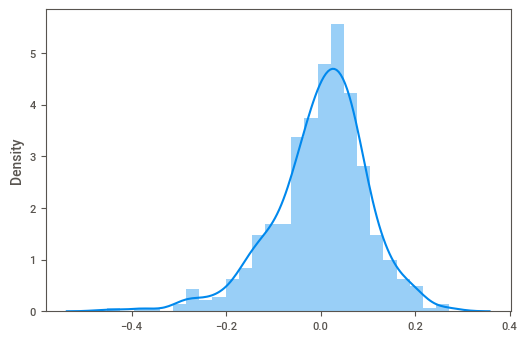

In [57]:
# Predicting target values from train dataset

y_train_pred = lm_model.predict(X_train_rfe_const)

# Residual Analysis
res = y_train - y_train_pred

sns.distplot(res)
plt.show()

In [58]:
# Predicting target values from test dataset
# before predicting we need to scale the test dataset similar to train dataset

bike_data_test[num_vars] = scaler.transform(bike_data_test[num_vars])
# num_vars here is the list of numeric variables which we have declared before scaling train dataset
bike_data_test.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0
404,1,0,1,0.256524,0.579218,0.326196,0.438104,1,0,0,...,0,0,0,1,0,0,0,0,0,0
198,0,0,1,0.856704,0.671103,0.372990,0.510354,0,0,0,...,0,0,0,0,0,0,0,1,0,0
171,0,0,1,0.774672,0.793903,0.276724,0.553728,0,0,0,...,0,0,0,0,0,1,0,0,1,0
512,1,1,0,0.814131,0.696865,0.331536,0.692706,0,1,0,...,0,0,0,0,0,0,0,1,0,0
200,0,0,1,0.883701,0.728638,0.153738,0.495858,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# checking the shape of X_train_rfe and bike_data_test
print(X_train_rfe.shape)
print(bike_data_test.shape)

(510, 9)
(220, 29)


In [60]:
# keeping the same columns for X_test as in X_train_rfe

X_test = bike_data_test[X_train_rfe.columns]
y_test = bike_data_test.cnt
X_test.shape

(220, 9)

In [61]:
# adding constant to X_test

X_test_const = sm.add_constant(X_test)

# checking the shape of X_train_rfe_const and X_test_const
print(X_test_const.shape)
print(X_train_rfe_const.shape)

(220, 10)
(510, 10)


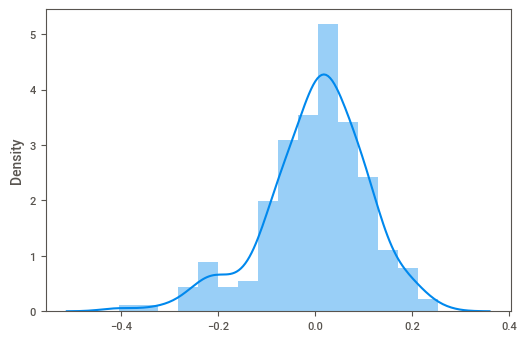

In [62]:
# prediciting target values from test dataset

y_test_pred = lm_model.predict(X_test_const)

# Residual Analysis
res = y_test - y_test_pred

sns.distplot(res)
plt.show()

In [63]:
# Evaluating the model
print(f"R2 Score for Train Dataset= {r2_score(y_true=y_train, y_pred=y_train_pred)}")
print(f"R2 Score for Test Dataset= {r2_score(y_true=y_test, y_pred=y_test_pred)}")

R2 Score for Train Dataset= 0.8047750778849656
R2 Score for Test Dataset= 0.7717629996668943


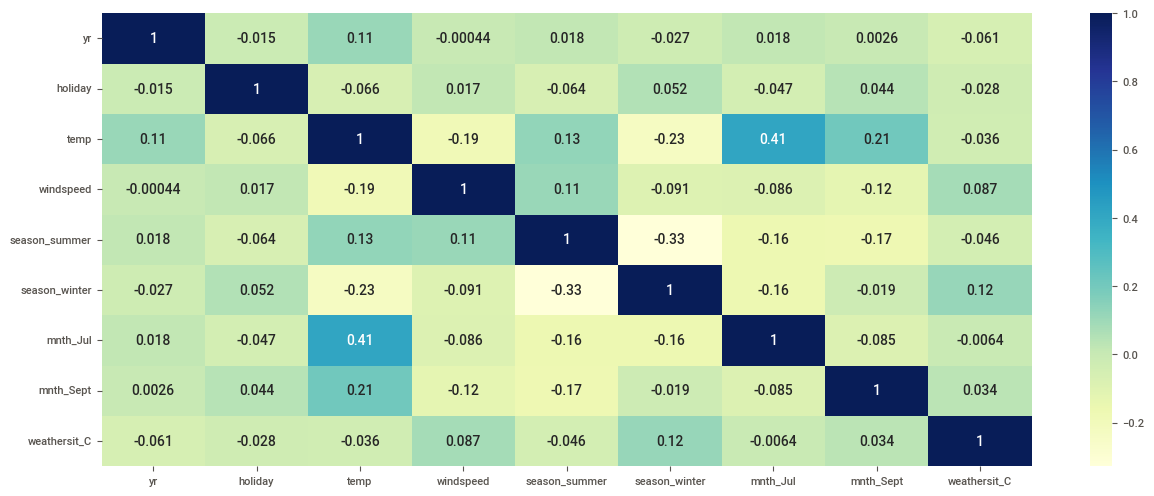

In [64]:
# checking correlation of final predictor variables

plt.figure(figsize=[15,6])
sns.heatmap(X_train_rfe.corr(), annot=True, cmap="YlGnBu")
plt.show()

__Since the R2 Score for both the train and dataset (i.e., 80% and 77%) has a difference of within 5, the Adjusted R-squared is 80.1% and the final predictor variables seems to have pretty low correlation, we can conclude this to be a good Linear Regression Model. One can go predict count of daily bike rentals using this model.__